<a href="https://colab.research.google.com/github/notArnab/Indian-Sign-Language_Detection/blob/main/SignLanguageDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Dense,Flatten, Dropout
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.optimizers import SGD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip archive1.zip

Archive:  archive1.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [ ]:
test = pd.read_csv(r"/content/sign_mnist_test/sign_mnist_test.csv")

In [ ]:
train = pd.read_csv(r"/content/sign_mnist_train/sign_mnist_train.csv")

In [ ]:
y_train = train['label'].values
y_test = test['label'].values

X_train = train.drop(['label'],axis=1)
X_test = test.drop(['label'], axis=1)

X_train = np.array(X_train.iloc[:,:])
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])

X_test = np.array(X_test.iloc[:,:])
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])

num_classes = 26
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]


In [ ]:
X_train = X_train.reshape((27455, 28, 28, 1))
X_test = X_test.reshape((7172, 28, 28, 1))

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(filters=8, kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),activation='relu', data_format='channels_last'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size=(4,4)))
classifier.add(Dense(128, activation='relu'))
classifier.add(Flatten())
classifier.add(Dense(26, activation='softmax'))
classifier.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(X_train, y_train, epochs=50, batch_size=100)


Epoch 1/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.2039 - loss: 12.5422
Epoch 2/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.6523 - loss: 1.0511
Epoch 3/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.7496 - loss: 0.7357
Epoch 4/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.8105 - loss: 0.5549
Epoch 5/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.8457 - loss: 0.4436
Epoch 6/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.8724 - loss: 0.3654
Epoch 7/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.8897 - loss: 0.3145
Epoch 8/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9136 - loss: 0.2497
Epoch 9/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.9193 - loss: 0.2362
Epoch 10/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.9263 - loss: 0.2102
Epoch 11/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.9389 - loss: 0.1752
Epoch 12/50
275/275 ━━━━━━━━━

In [ ]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3, 3, 128)           │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │          29,978 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,208 (391.44 KB)

 Trainable params: 33,402 (130.48 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 66,806 (260.96 KB)

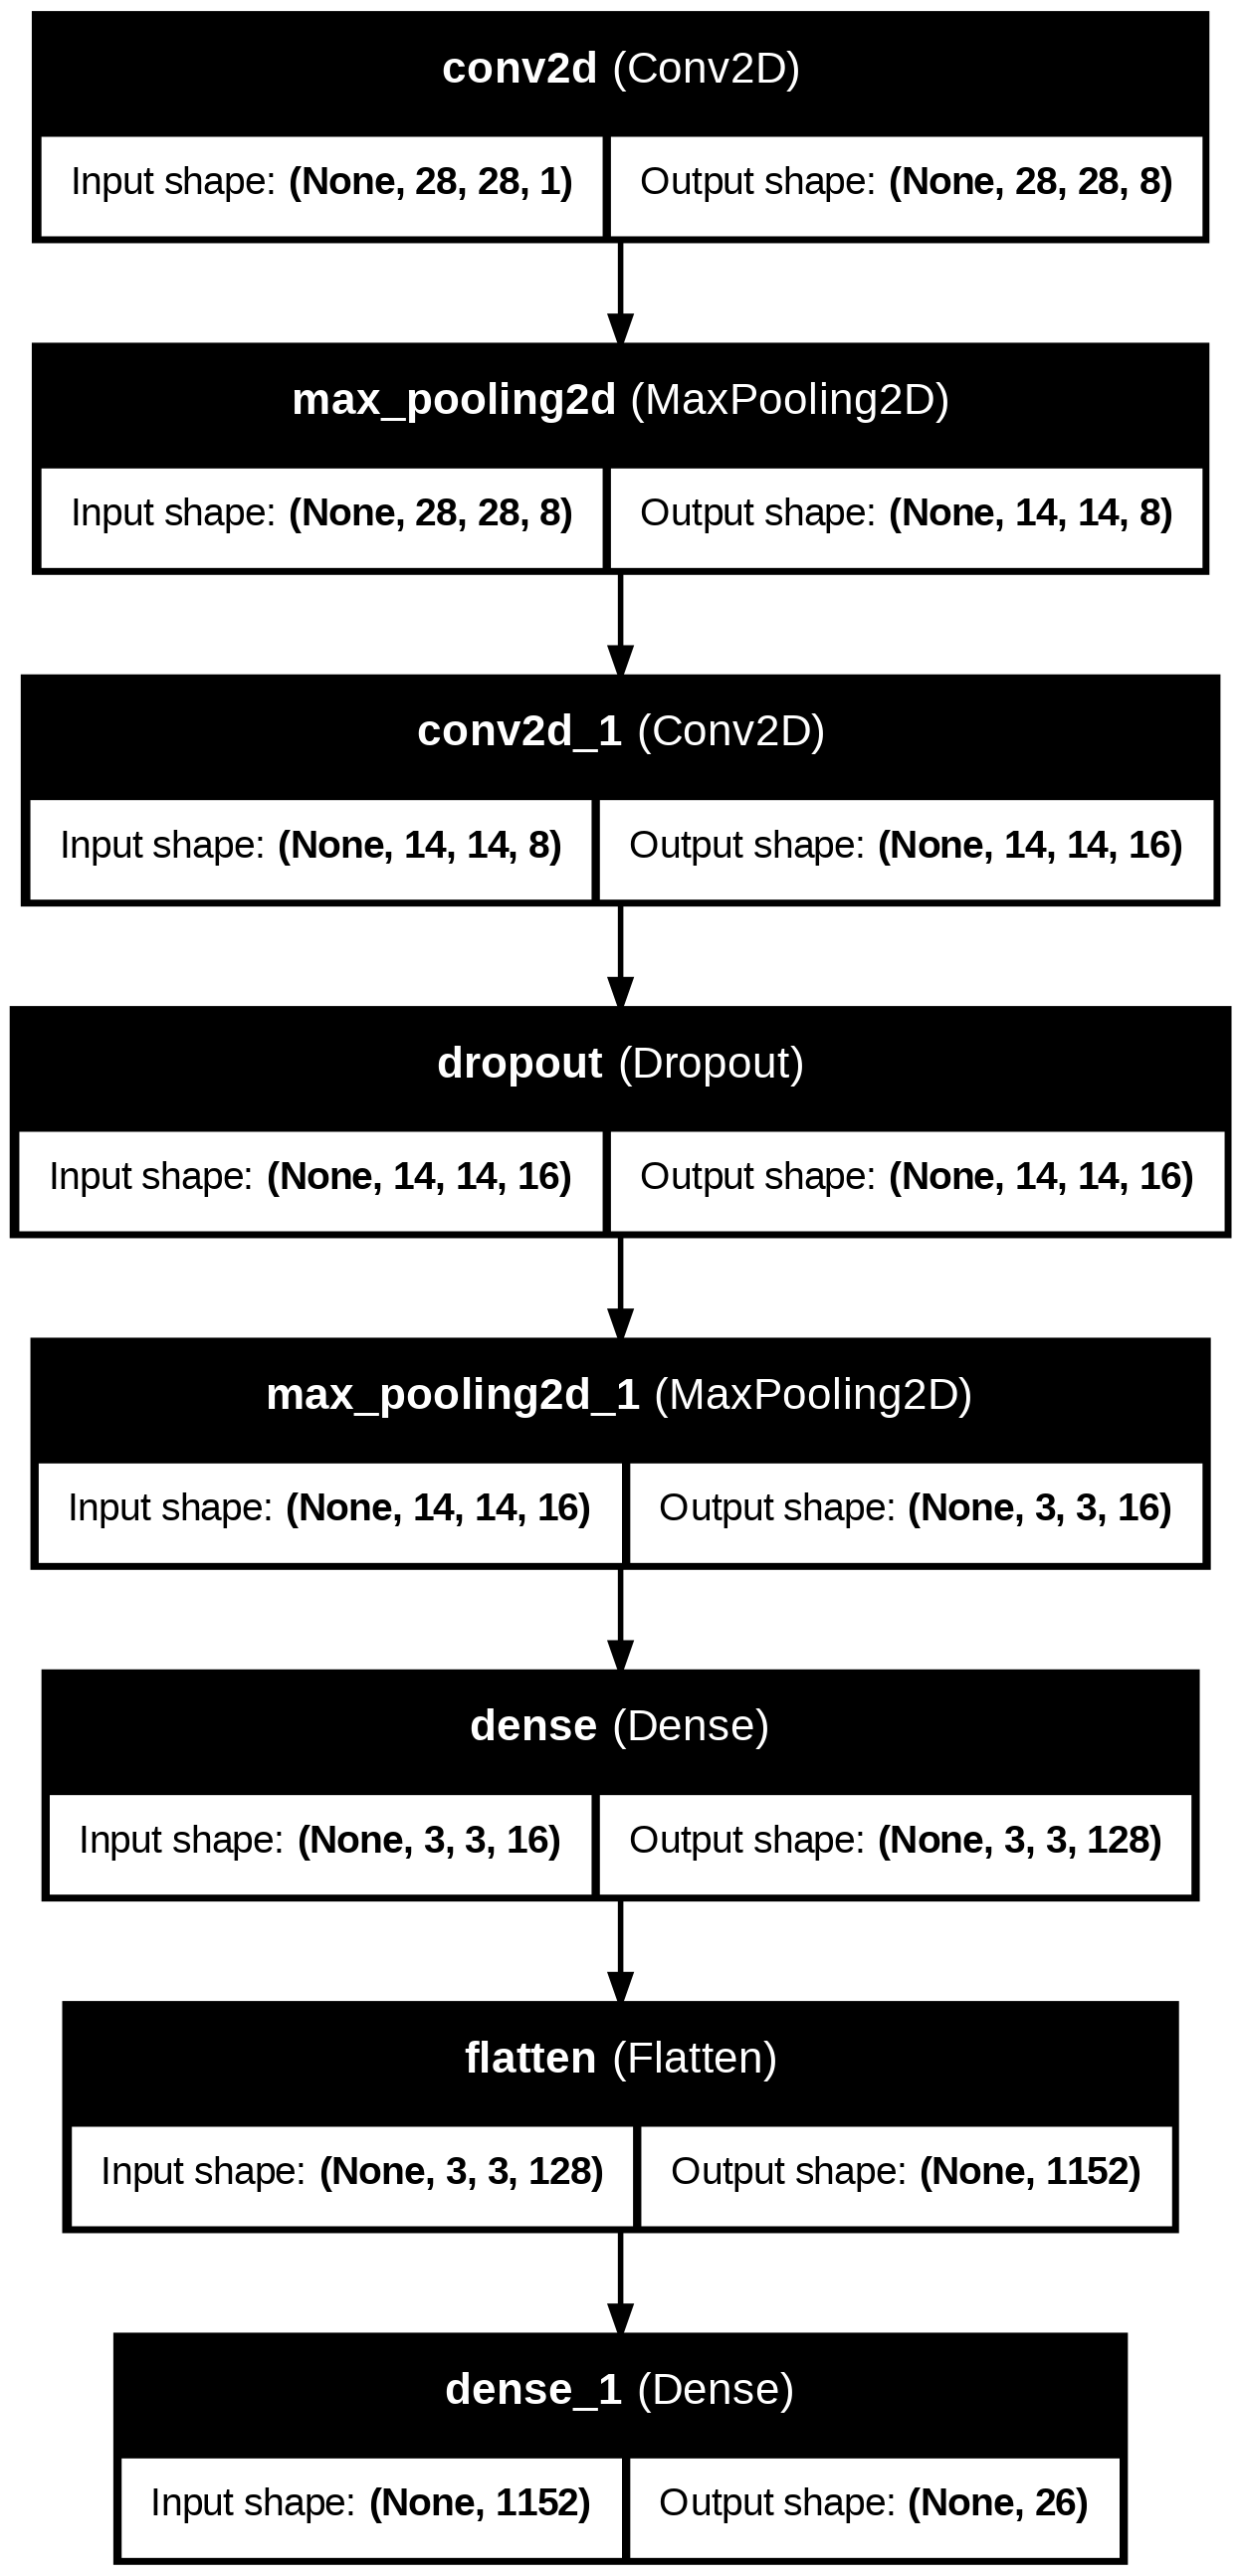

In [ ]:
from keras.utils import plot_model
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
accuracy = classifier.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9415 - loss: 0.2603
Accuracy:  0.9465978741645813


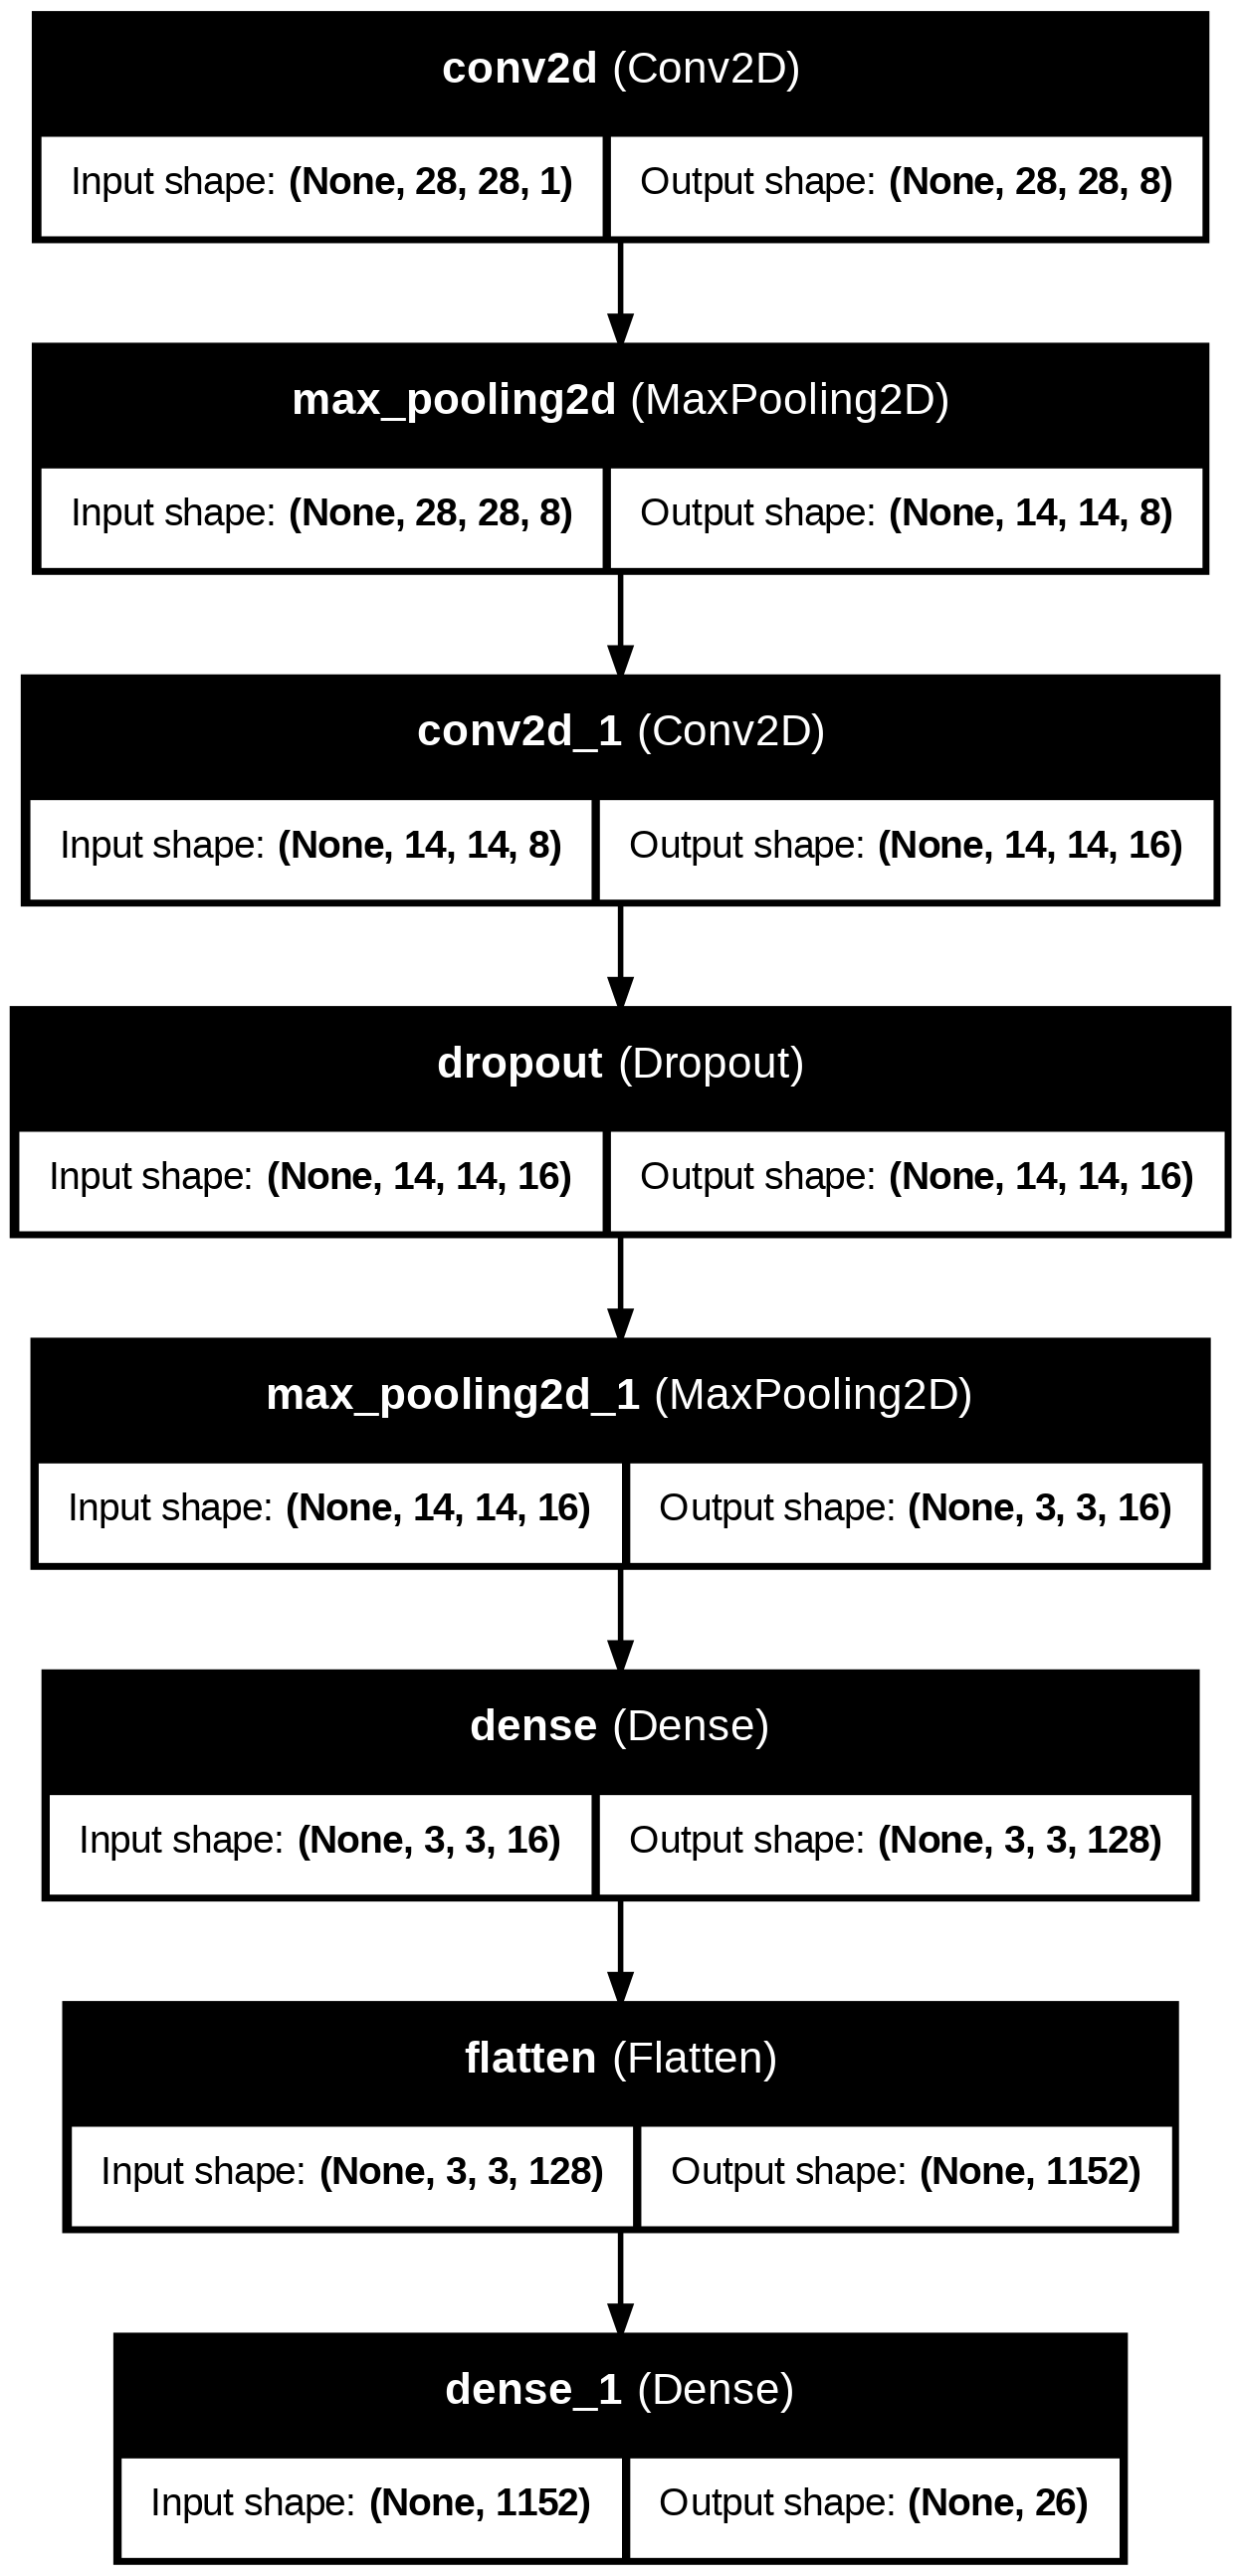

In [ ]:
plot_model(classifier, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [ ]:
classifier.save('CNNmodel.h5')